In [33]:
from modsim import *
#notes: beta = infection rate
# alpha = kill rate

In [34]:
#parameters
beta = 0.01
alpha = 0.005
n = 1000 #initial population

s = n - 1
z = 1
r = 0


#S' = sigma - beta*S*Z - delta_S*S
#I' = beta*S*Z - rho*I - delta_I*I
#Z' = rho*I - alpha*S*Z
#R' = delta_S*S + delta_I*I + alpha*S*Z

In [35]:
init_state = State(s =  n - 1, z=1, r=0)
show(init_state)


,state
s,999
z,1
r,0


In [36]:
init_state /= init_state.sum()
show(init_state)


,state
s,0.999
z,0.001
r,0.000


In [37]:
tc = 2 #time between contact
tr = 7 #recovery time in days


In [38]:
beta = 0.01
alpha = 0.005

In [39]:
def make_system(beta, alpha):
    init = State(s = n - 1,  z = 1, r = 0)
    init /= init.sum()
    return System(init = init, t_end = 1000, beta = beta, alpha = alpha)

In [40]:
system = make_system(beta, alpha)
show(system)

,value
init,"s 0.999 z 0.001 r 0.000 Name: state, ..."
t_end,1000
beta,0.01
alpha,0.005


In [41]:
def update_func(t,state, system):
    s, z, r = state.s, state.z, state.r
    dSdt = -system.beta * s * z
    dZdt = system.beta * s * z - system.alpha * s * z
    dRdt = system.alpha * s * z
   
    s += dSdt 
    z += dZdt 
    r += dRdt 

    return State(s = s, z = z, r = r)

In [42]:
state = update_func(0, init_state, system)
show(state)


,state
s,0.998990
z,0.001005
r,0.000005


In [43]:
#simulation step
def run_simulation1(system, update_func):
    state = system.init
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        return state

In [44]:
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,0.998990
z,0.001005
r,0.000005


In [45]:
def run_simulation2(system, update_func):
    s = TimeSeries()
    z = TimeSeries()
    r = TimeSeries()

    state = system.init
    s[0], z[0], r[0] = state #r0

    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        s[t+1], z[t+1], r[t+1] = state.s, state.z, state.r
    return s, z, r

In [46]:
s, z, r = run_simulation2(system, update_func)


In [47]:
def plot_results(S, Z, R):
    S.plot(style='--', label = 'Susceptible')
    Z.plot(style='-', label = 'Infected')
    R.plot(style=':', label = 'Recovered')
    decorate(xlabel='Time(days)', ylabel = 'Fraction of population')

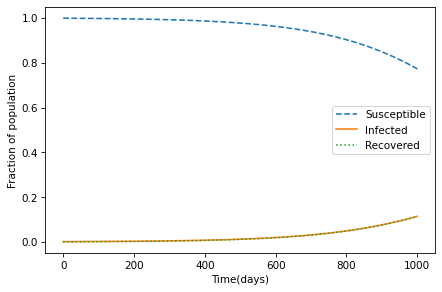

In [48]:
plot_results(s, z, r)